In [82]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from practice import MyLayerNorm
import matplotlib.pyplot as plt

In [142]:
def get_keras_vals(tensor):
    '''
    This function calculates the layer normalization outputs
    using Keras's layer
    '''
    layernorm = tf.keras.layers.LayerNormalization()
    return layernorm(tensor)

In [143]:
def get_custom_vals(tensor):
    '''
    This function calculates my custom layer output
    using my custom layer
    '''
    layernorm = MyLayerNorm()
    return layernorm(tensor)

In [137]:
def comparing_layers(tensor, batch_size=32):
    rows = tensor.shape[0]
    rounds = rows // batch_size
    L2 = []
    inf = []
    num_diff = []
    start = 0
    stop = batch_size
    for batch in range(0, rounds):
        if batch == (rounds - 1):

            # gettng layernorm values
            sample = tensor[start:]
            keras_vals = get_keras_vals(sample)
            custom_vals = get_custom_vals(sample)

            # getting l infinity norm
            linf_K = tf.norm(keras_vals, ord=np.inf).numpy()
            linf_C = tf.norm(custom_vals, ord=np.inf).numpy()

            # getting l2 norm
            diff = tf.subtract(keras_vals, custom_vals)
            l2norm = tf.norm(diff).numpy()

            # getting euclidean distance
            truediff = tf.reduce_sum(tf.abs(diff)).numpy()

            # putting values in a list
            L2.append(l2norm)
            inf.append(linf_K - linf_C)
            num_diff.append(truediff)
            
        else:

            # getting layernorm values
            sample = tensor[start:stop]
            keras_vals = get_keras_vals(sample)
            custom_vals = get_custom_vals(sample)

            # getting l infinity norm
            linf_K = tf.norm(keras_vals, ord=np.inf).numpy()
            linf_C = tf.norm(custom_vals, ord=np.inf).numpy()

            # getting l2 norm
            diff = tf.subtract(keras_vals, custom_vals)
            l2norm = tf.norm(diff).numpy()

            # getting euclidean distance
            true_diff = tf.reduce_sum(tf.abs(diff)).numpy()

            # putting values in a list
            L2.append(l2norm)
            inf.append(linf_K - linf_C)
            num_diff.append(true_diff)

            # incrimenting indixies
            start += batch_size
            stop += batch_size
            
    return num_diff, L2, inf

In [144]:
test = tf.random.uniform(shape=[320, 100], minval=-10., maxval=10.)

In [138]:
df = comparing_layers(test)

In [104]:
df[0]

['batch1',
 'batch2',
 'batch3',
 'batch4',
 'batch5',
 'batch6',
 'batch7',
 'batch8',
 'batch9',
 'batch10']

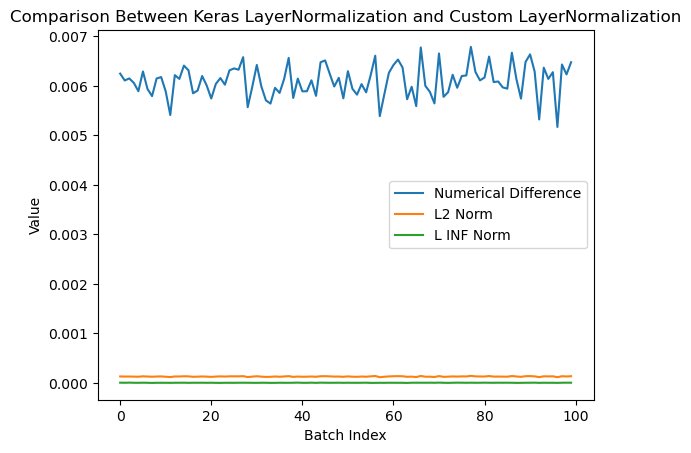

In [145]:
plt.plot(df[0], label="Numerical Difference")
plt.plot(df[1], label="L2 Norm")
plt.plot(df[2], label="L INF Norm")
plt.title("Comparison Between Keras LayerNormalization and Custom LayerNormalization")
plt.xlabel("Batch Index")
plt.ylabel("Value")
plt.legend()
plt.show()

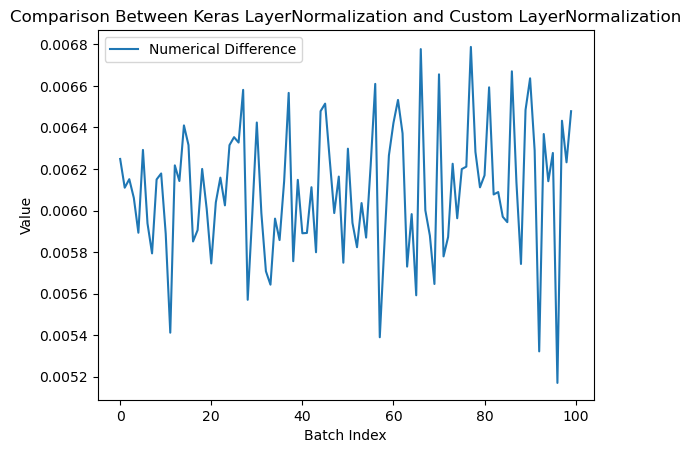

In [146]:
plt.plot(df[0])
plt.title("Numerical Difference Between Keras LayerNormalization and Custom LayerNormalization")
plt.xlabel("Batch Index")
plt.ylabel("Value")
plt.legend()
plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'col'

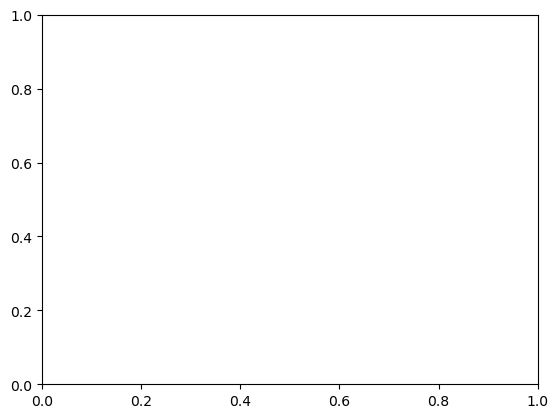

In [147]:
plt.plot(df[1], color='orange')
plt.title("L2 Norm of Difference Between Keras LayerNormalization and Custom LayerNormalization")
plt.xlabel("Batch Index")
plt.ylabel("Value")
plt.legend()
plt.show()